In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
df = pd.read_csv("D:\ML projects\churn\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

df["gender"] = df["gender"].map({"Female": 0,"Male": 1})



<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\MUET\AppData\Local\Temp\ipykernel_3808\372334412.py:6: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\ML projects\churn\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")


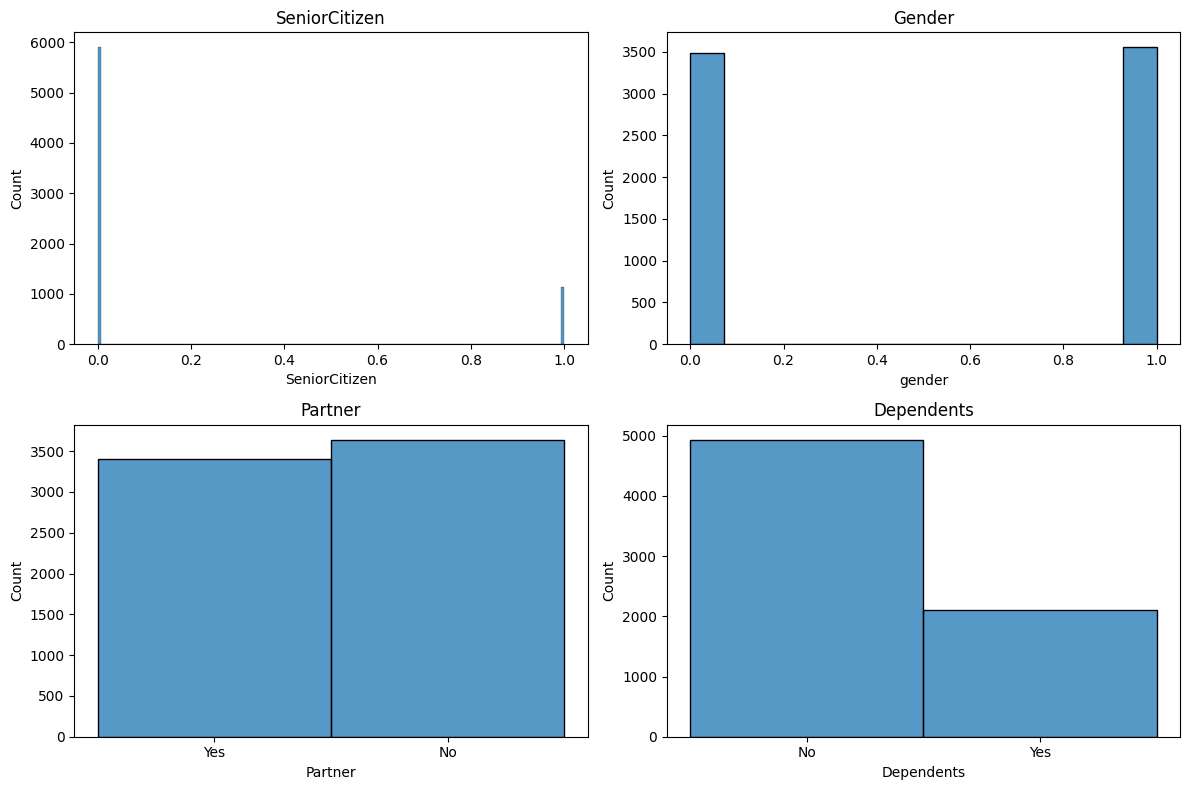

In [43]:


# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot each histogram
sns.histplot(x="SeniorCitizen", data=df, ax=axes[0, 0])
axes[0, 0].set_title("SeniorCitizen")

sns.histplot(x="gender", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Gender")

sns.histplot(x="Partner", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Partner")

sns.histplot(x="Dependents", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Dependents")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


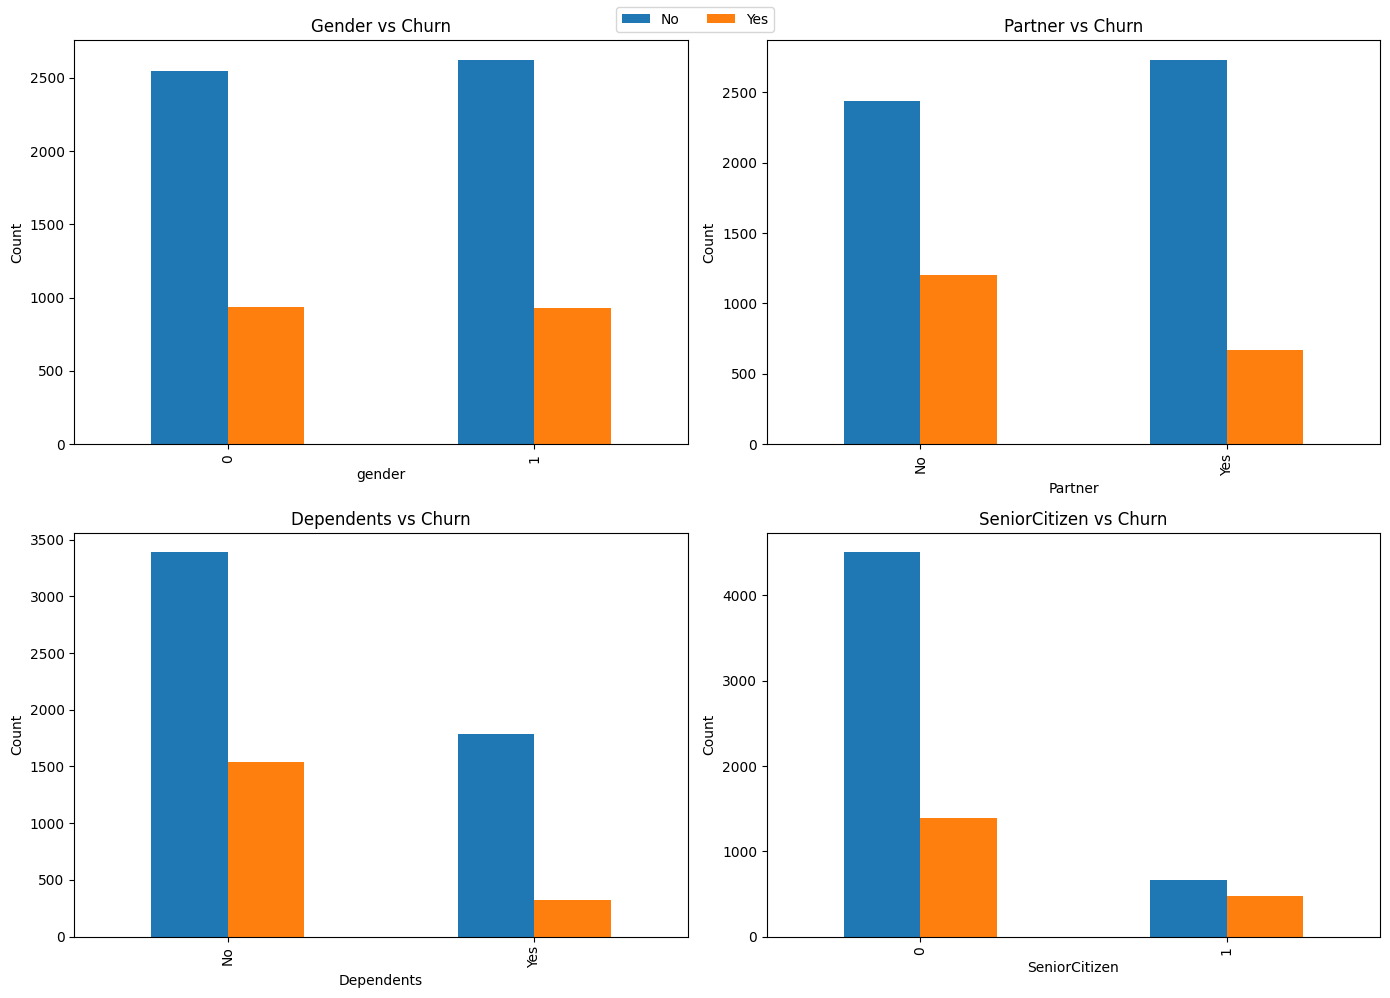

In [44]:


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Pivot tables and plots
pivot1 = pd.crosstab(df["gender"], df["Churn"])
pivot1.plot(kind="bar", ax=axes[0, 0], legend=False)
axes[0, 0].set_title("Gender vs Churn")
axes[0, 0].set_ylabel("Count")

pivot2 = pd.crosstab(df["Partner"], df["Churn"])
pivot2.plot(kind="bar", ax=axes[0, 1], legend=False)
axes[0, 1].set_title("Partner vs Churn")
axes[0, 1].set_ylabel("Count")

pivot3 = pd.crosstab(df["Dependents"], df["Churn"])
pivot3.plot(kind="bar", ax=axes[1, 0], legend=False)
axes[1, 0].set_title("Dependents vs Churn")
axes[1, 0].set_ylabel("Count")

pivot4 = pd.crosstab(df["SeniorCitizen"], df["Churn"])
pivot4.plot(kind="bar", ax=axes[1, 1], legend=False)
axes[1, 1].set_title("SeniorCitizen vs Churn")
axes[1, 1].set_ylabel("Count")

# Adjust layout and add legend once
plt.tight_layout()
fig.legend(labels=pivot1.columns, loc="upper center", ncol=len(pivot1.columns))
plt.show()



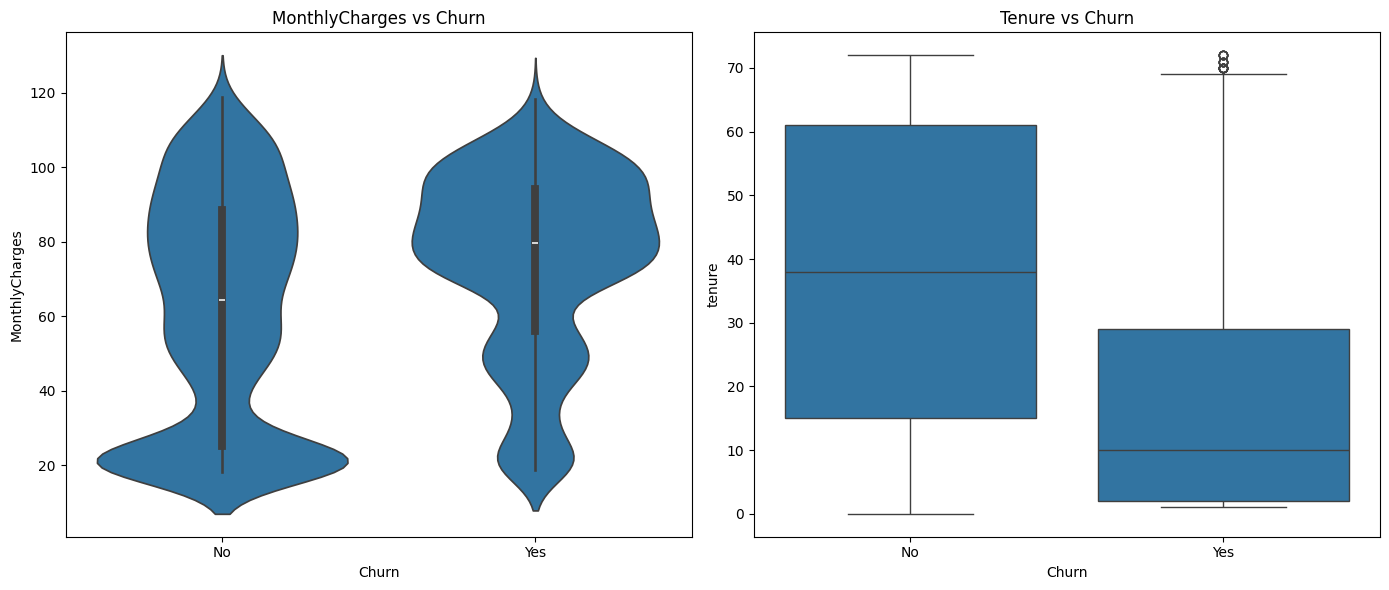

In [45]:


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Violinplot: MonthlyCharges vs Churn
sns.violinplot(x="Churn", y="MonthlyCharges", data=df, ax=axes[0])
axes[0].set_title("MonthlyCharges vs Churn")

# Boxplot: tenure vs Churn
sns.boxplot(x="Churn", y="tenure", data=df, ax=axes[1])
axes[1].set_title("Tenure vs Churn")

# Adjust layout
plt.tight_layout()
plt.show()


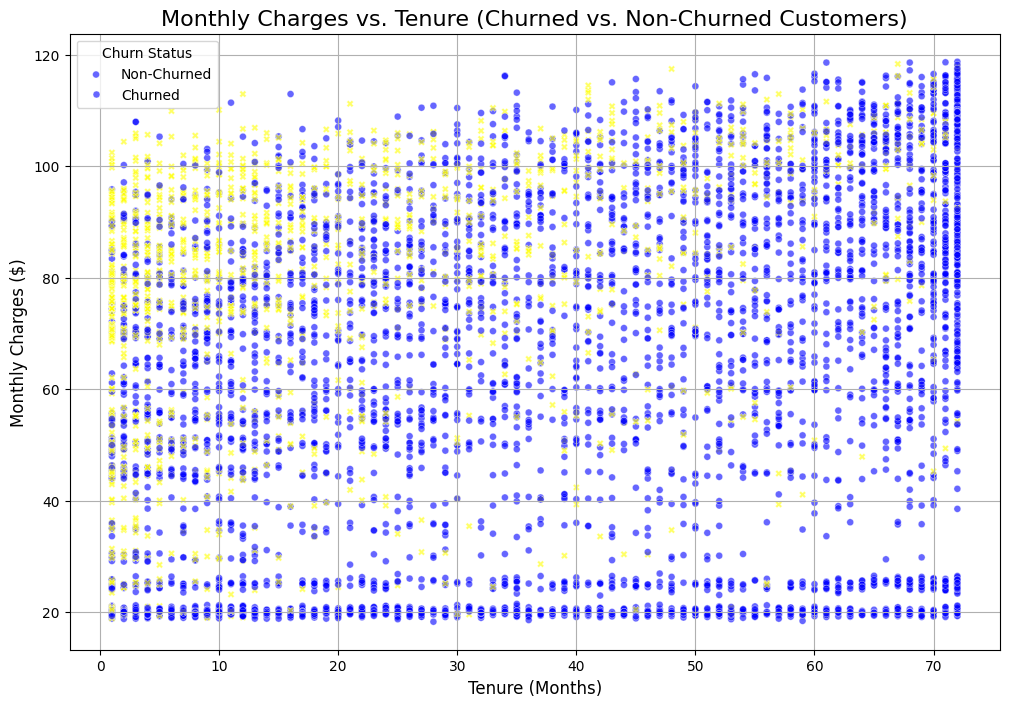

In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='tenure',
    y='MonthlyCharges',
    hue='Churn',
    style='Churn',
    palette=['blue', 'yellow'], # Use red for churned, blue for non-churned
    s=25, # Point size
    alpha=0.6 # Transparency
)

# Set the title and axis labels
plt.title('Monthly Charges vs. Tenure (Churned vs. Non-Churned Customers)', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)

# Add a legend for clarity
plt.legend(title='Churn Status', labels=['Non-Churned', 'Churned'])

# Show the plot
plt.grid(True)
plt.show()


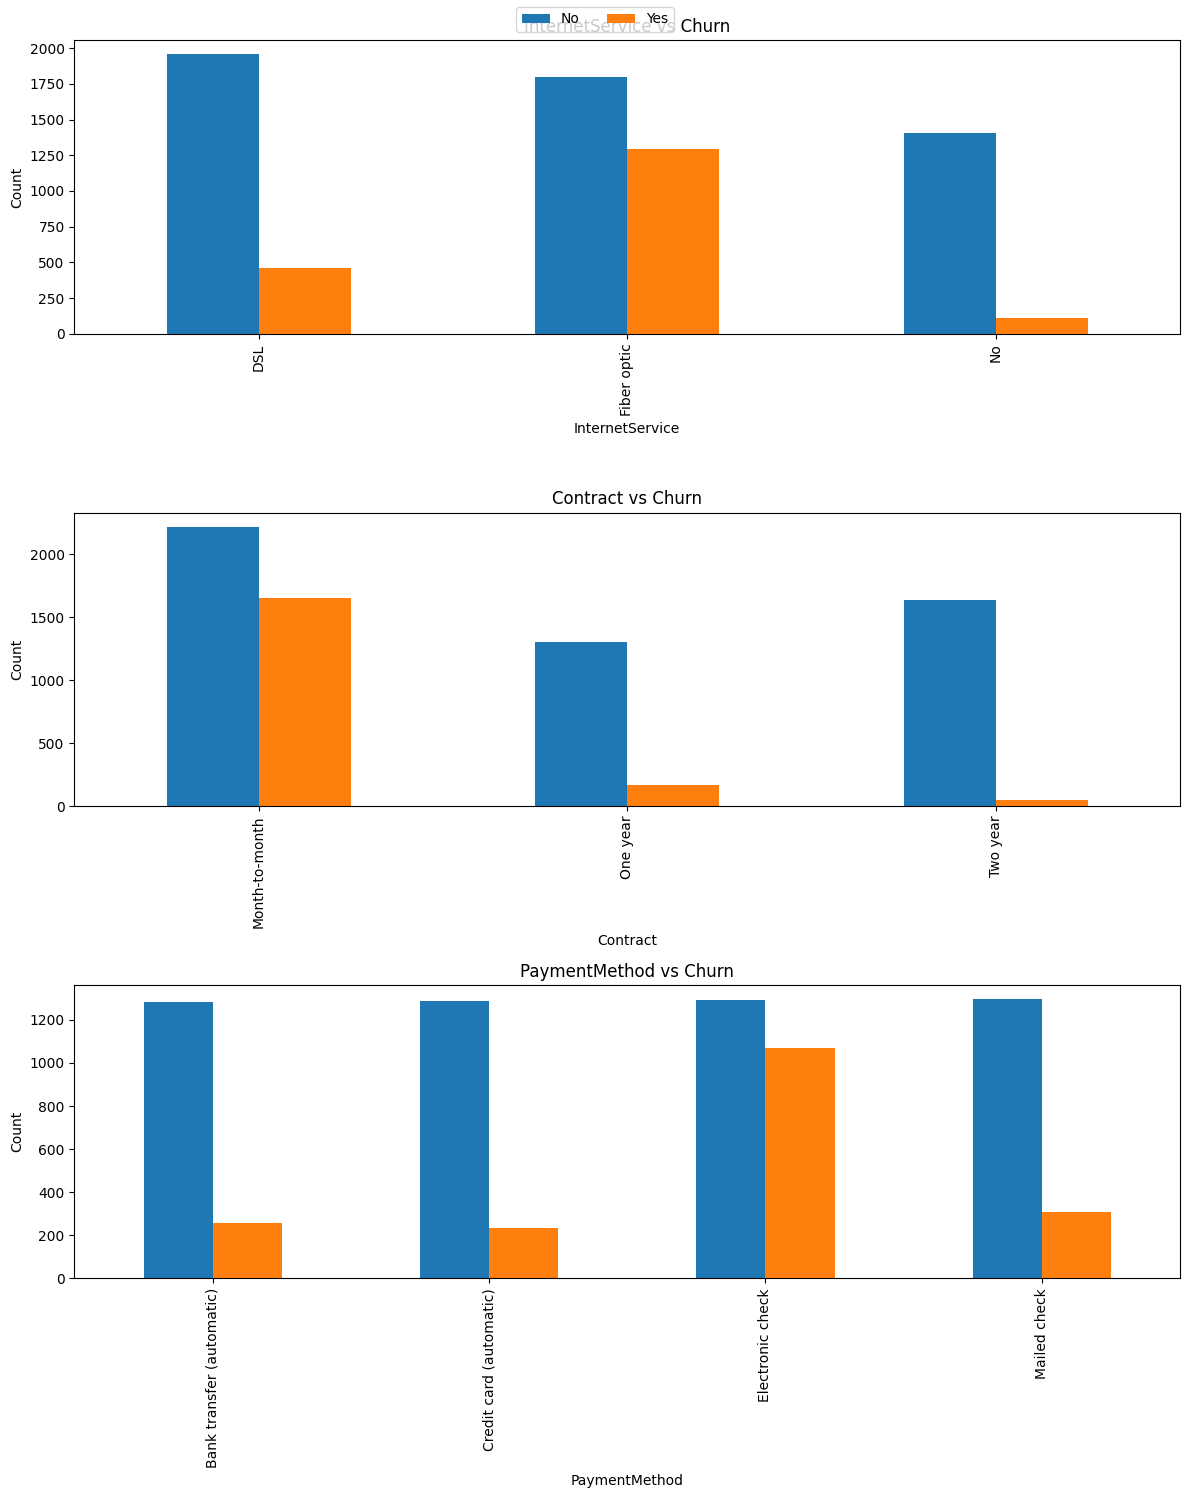

In [47]:

# Create subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# InternetService vs Churn
pivot1 = pd.crosstab(df["InternetService"], df["Churn"])
pivot1.plot(kind="bar", ax=axes[0], legend=False)
axes[0].set_title("InternetService vs Churn")
axes[0].set_ylabel("Count")

# Contract vs Churn
pivot2 = pd.crosstab(df["Contract"], df["Churn"])
pivot2.plot(kind="bar", ax=axes[1], legend=False)
axes[1].set_title("Contract vs Churn")
axes[1].set_ylabel("Count")

# PaymentMethod vs Churn
pivot3 = pd.crosstab(df["PaymentMethod"], df["Churn"])
pivot3.plot(kind="bar", ax=axes[2], legend=False)
axes[2].set_title("PaymentMethod vs Churn")
axes[2].set_ylabel("Count")

# Adjust layout and add one shared legend
plt.tight_layout()
fig.legend(labels=pivot1.columns, loc="upper center", ncol=len(pivot1.columns))
plt.show()


C:\Users\MUET\AppData\Local\Temp\ipykernel_9340\1614851509.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({"Yes": 1, "No": 0, "No internet service": 0})


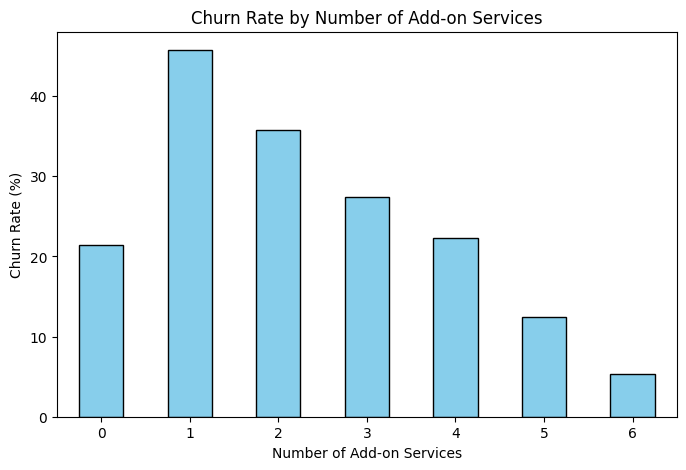


Churn Rate by Service (Yes vs No):
                    Yes     No
OnlineBackup      21.57  29.22
OnlineSecurity    14.64  31.37
StreamingMovies   29.95  24.44
StreamingTV       30.11  24.37
DeviceProtection  22.54  28.70
TechSupport       15.20  31.23


In [ ]:
# Convert Churn to numeric
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

services = ["OnlineBackup","OnlineSecurity","StreamingMovies",
            "StreamingTV","DeviceProtection","TechSupport"]

for col in services:
    df[col] = df[col].replace({"Yes": 1, "No": 0, "No internet service": 0})

# Count number of services per customer
df["ServiceCount"] = df[services].sum(axis=1)

# Analysis 1: Churn rate by ServiceCount
churn_by_count = df.groupby("ServiceCount")["Churn"].mean() * 100

plt.figure(figsize=(8,5))
churn_by_count.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Churn Rate by Number of Add-on Services")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Number of Add-on Services")
plt.xticks(rotation=0)
plt.show()

#Analysis 2: Individual service impact 
service_churn = {}
for col in services:
    churn_rate_yes = df[df[col] == 1]["Churn"].mean() * 100
    churn_rate_no = df[df[col] == 0]["Churn"].mean() * 100
    service_churn[col] = {"Yes": churn_rate_yes, "No": churn_rate_no}

# Convert to DataFrame for better view
service_churn_df = pd.DataFrame(service_churn).T
print("\nChurn Rate by Service (Yes vs No):")
print(service_churn_df.round(2))



CLV summary by churn status (0 = retained, 1 = churned):
       count     mean   median      std
Churn                                  
0       5163  2555.20  1691.75  2327.90
1       1869  1531.61   700.00  1886.77


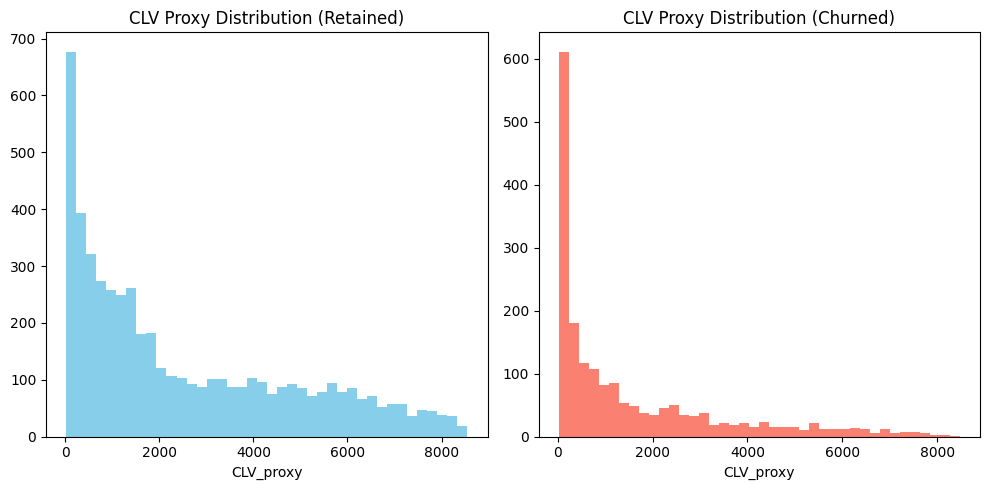

C:\Users\MUET\AppData\Local\Temp\ipykernel_9340\768729367.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df["Churn"]==0]["CLV_proxy"].dropna(),


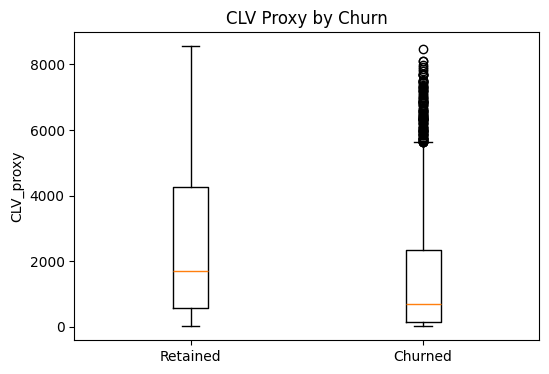


T-test: t=18.832, p=6.621e-76


In [4]:

from scipy import stats


# Estimate Customer Lifetime Value (CLV proxy)
df["CLV_proxy"] = df["MonthlyCharges"] * df["tenure"]


# Compare churned vs retained
clv_summary = df.groupby("Churn")["CLV_proxy"].agg(["count", "mean", "median", "std"])
print("\nCLV summary by churn status (0 = retained, 1 = churned):")
print(clv_summary.round(2))

# Histograms
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df[df["Churn"]==0]["CLV_proxy"].dropna(), bins=40, color="skyblue")
plt.title("CLV Proxy Distribution (Retained)")
plt.xlabel("CLV_proxy")

plt.subplot(1,2,2)
plt.hist(df[df["Churn"]==1]["CLV_proxy"].dropna(), bins=40, color="salmon")
plt.title("CLV Proxy Distribution (Churned)")
plt.xlabel("CLV_proxy")
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot([df[df["Churn"]==0]["CLV_proxy"].dropna(),
             df[df["Churn"]==1]["CLV_proxy"].dropna()],
            labels=["Retained","Churned"])
plt.ylabel("CLV_proxy")
plt.title("CLV Proxy by Churn")
plt.show()

# Statistical test
ret = df[df["Churn"]==0]["CLV_proxy"].dropna()
chd = df[df["Churn"]==1]["CLV_proxy"].dropna()
tstat, pval = stats.ttest_ind(ret, chd, equal_var=False)
print(f"\nT-test: t={tstat:.3f}, p={pval:.3e}")

Data transform

In [6]:
df = df.drop(columns=["customerID"])
df["Partner"] = df["Partner"].map({"Yes": 1, "No": 0})
df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})
df["PhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0})
df["MultipleLines"] = df["MultipleLines"].replace({"Yes": 1, "No": 0, "No phone service": 0})
df["InternetService"] = df["InternetService"].replace({"DSL": 1, "Fiber optic": 2, "No": 0})
df["Contract"] = df["Contract"].replace({"Month-to-month": 0, "One year": 1, "Two year": 2})
df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes": 1, "No": 0})
# one hot encode for df["PaymentMethod"] through scikit learn
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(df[["PaymentMethod"]])
df = df.drop(columns=["PaymentMethod"])
df = pd.concat([df, pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["PaymentMethod"]))], axis=1)
df = df.dropna()


KeyError: "['customerID'] not found in axis"

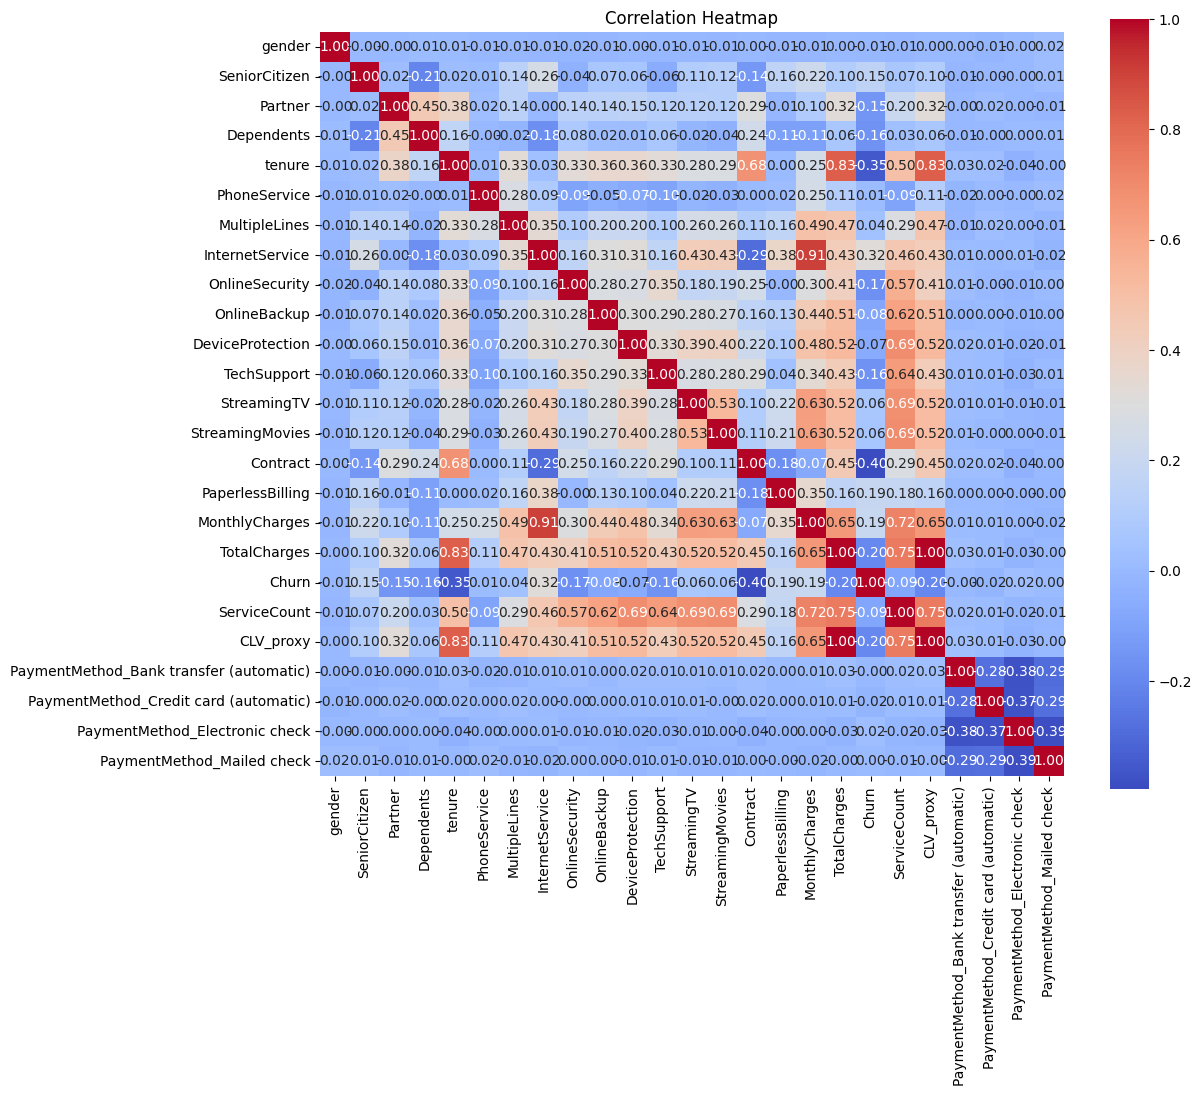

Churn                                      1.000000
InternetService                            0.316350
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingTV                                0.063254
StreamingMovies                            0.060860
MultipleLines                              0.040033
PaymentMethod_Electronic check             0.019456
PhoneService                               0.011691
PaymentMethod_Mailed check                 0.002686
PaymentMethod_Bank transfer (automatic)   -0.003138
gender                                    -0.008545
PaymentMethod_Credit card (automatic)     -0.021902
DeviceProtection                          -0.066193
OnlineBackup                              -0.082307
ServiceCount                              -0.087882
Partner                                   -0.149982
Dependents                                -0.163128
TechSupport 

In [56]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()
df.corr()["Churn"].sort_values(ascending=False)

Macine learning test

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.25

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators=300,class_weight="balanced", random_state=42,n_jobs=1)
rf.fit(X_train, y_train)
proba = rf.predict_proba(X_test)[:,1]
y_pred = (proba>=THRESHOLD).astype(int)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78      1032
         1.0       0.48      0.79      0.60       373

    accuracy                           0.72      1405
   macro avg       0.69      0.74      0.69      1405
weighted avg       0.79      0.72      0.73      1405



In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.2,0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.2     0.455   0.842   0.591   
0.25    0.481   0.794   0.599   
0.3     0.519   0.740   0.610   
0.35    0.539   0.673   0.598   
0.4     0.564   0.601   0.582   
0.45    0.595   0.555   0.574   
0.5     0.632   0.488   0.551   


In [27]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Training timer
start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1493, number of negative: 4123
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 5616, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
⏱ Training time: 1.30 seconds
⏱ Prediction time: 0.0196 seconds
              precision    recall  f1-score   support

         0.0      0.912     0.652     0.760      1032
         1.0      0.462     0.826     0.592       373

    accuracy                          0.698      1405
   macro avg      0.687     0.739     0.676      1405
weighted avg      0.792     0.698     0.716      1405



In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for LightGBM
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.462   0.826   0.592   
0.3     0.479   0.810   0.602   
0.35    0.496   0.780   0.606   
0.4     0.496   0.737   0.593   
0.45    0.511   0.716   0.597   
0.5     0.528   0.686   0.597   


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.67 seconds
⏱ Prediction time: 0.0120 seconds
              precision    recall  f1-score   support

         0.0      0.915     0.643     0.755      1032
         1.0      0.458     0.834     0.591       373

    accuracy                          0.694      1405
   macro avg      0.686     0.739     0.673      1405
weighted avg      0.793     0.694     0.712      1405



In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.458   0.834   0.591   
0.3     0.469   0.804   0.593   
0.35    0.492   0.788   0.606   
0.4     0.510   0.759   0.610   
0.45    0.520   0.710   0.600   
0.5     0.532   0.665   0.591   


In [10]:
import  optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    model = XGBClassifier(**params)
    model.fit(X_train,y_train)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)  # Keep your tuned threshold
    return recall_score(y_test, y_pred, pos_label=1) 


study = optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

d:\ML projects\churn\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2026-02-10 23:07:29,131] A new study created in memory with name: no-name-9d458022-4b1b-4150-a531-5fe9c376fe2c
[I 2026-02-10 23:07:30,014] Trial 0 finished with value: 0.8471849865951743 and parameters: {'n_estimators': 448, 'learning_rate': 0.16922528860364497, 'max_depth': 9, 'subsample': 0.5152989530054588, 'colsample_bytree': 0.9877225633440856, 'min_child_weight': 1, 'gamma': 1.9985685359058873, 'reg_alpha': 2.9324482632468465, 'reg_lambda': 2.429021821522714}. Best is trial 0 with value: 0.8471849865951743.
[I 2026-02-10 23:07:31,029] Trial 1 finished with value: 0.8954423592493298 and parameters: {'n_estimators': 511, 'learning_rate': 0.12270683760167683, 'max_depth': 3, 'subsample': 0.5501606145121999, 'colsample_bytree': 0.903599

Best Params: {'n_estimators': 590, 'learning_rate': 0.14719181266727097, 'max_depth': 7, 'subsample': 0.9983696884312135, 'colsample_bytree': 0.7149306614243135, 'min_child_weight': 8, 'gamma': 3.6807296119917674, 'reg_alpha': 2.131830528498381, 'reg_lambda': 0.6290021604996412}
Best Recall: 0.9463806970509383


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Add the scale_pos_weight and fixed params to the best ones from Optuna
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

# Create model from best params
xgb = XGBClassifier(**best_params)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.36 seconds
⏱ Prediction time: 0.0053 seconds
              precision    recall  f1-score   support

         0.0      0.963     0.502     0.660      1032
         1.0      0.407     0.946     0.569       373

    accuracy                          0.620      1405
   macro avg      0.685     0.724     0.615      1405
weighted avg      0.815     0.620     0.636      1405



In [1]:
import mlflow
import os
import mlflow.xgboost
from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,roc_auc_score
from dotenv import load_dotenv

load_dotenv()
mlflow.set_experiment("Telco Churn - XGBoost")
with mlflow.start_run():
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # Best params from Optuna
    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })
    mlflow.log_param(best_params)

    # Training timer

    
    start_train = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train, y_train)
    train_time = time.time() - start_train
    mlflow.log_metric("train_time", train_time)

    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)
# Metrics
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, proba)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", auc)

    # Save model
    mlflow.xgboost.log_model(xgb, "model")

    print(classification_report(y_test, y_pred, digits=3))


KeyboardInterrupt: 

NameError: name 'df' is not defined